# Clasificadores Naive Bayes

```{admonition} Observación
- Los `clasificadores Naive Bayes` son una familia de clasificadores que `son bastante similares a los modelos lineales discutidos en la sección anterior. Sin embargo, tienden a ser incluso más rápidos en entrenamiento`. El precio que se paga por esta eficiencia es que los modelos de Naive Bayes `suelen proporcionar rendimiento de generalización que es ligeramente inferior al de los clasificadores lineales como LogisticRegression y LinearSVC`.

- La razón por la que los modelos de Naive Bayes son tan eficientes es que `aprenden los parámetros observando cada característica individualmente y recogen estadísticas simples por clase de cada característica`. Hay tres tipos de clasificadores Naive Bayes implementados en `scikit-learn`: `GaussianNB, BernoulliNB y MultinomialNB`.

- `GaussianNB puede aplicarse a cualquier dato continuo`, mientras que `BernoulliNB asume datos binarios` y `MultinomialNB supone datos de recuento` (es decir, que `cada característica representa un recuento entero`, como por ejemplo la frecuencia de aparición de una palabra). `BernoulliNB` y `MultinomialNB` se utilizan sobre todo en la `clasificación de datos de texto`. El clasificador `BernoulliNB` cuenta la frecuencia con la que cada característica de cada clase es distinta de cero.
```

## Formulación

En la clasificación mediante el `enfoque Bayesiano`, el concepto básico está plasmado en el `Teorema de Bayes`. Como ejemplo, `supongamos que hemos observado la aparición de un síntoma en un determinado paciente en forma de fiebre y necesitamos evaluar si ha sido causado por un resfriado o por la inﬂuenza`. **Si la probabilidad de que un resfriado sea la causa de la fiebre es mayor que la de la inﬂuenza, entonces podemos atribuir, al menos tentativamente, la fiebre de este paciente a un resfriado**. 

Este es el concepto subyacente de la `clasificación de Bayes`. El `Teorema de Bayes` da la `relación entre la probabilidad condicional de un evento basado en la información adquirida`, que en este caso puede `describirse de la siguiente manera`

En primer lugar, denotamos la probabilidad de `fiebre` ($D$) como síntoma de un `resfriado` ($G1$ ) y de la `inﬂuenza` ($G2$) por

$$
P(D|G_{1})=\frac{P(D\cap G_{1})}{P(G_{1})},\quad P(D|G_{2})=\frac{P(D\cap G_{2})}{P(G_{2})},
$$

respectivamente. $P(D|G_{1})$ y $P(D|G_{2})$ representan las `probabilidades de que la fiebre sea el resultado de un resfriado y de la inﬂuenza, respectivamente, y se denominan probabilidades condicionales`. Aquí, $P(G_{1})$ y $P(G_{2})$ $(P(G_{1})+P(G_{2}) =
1)$, son las `incidencias relativas de los resfriados y la inﬂuenza`, y se denominan probabilidades a priori. Se supone que estas `probabilidades condicionales y a priori pueden estimarse a partir de las observaciones y de la información acumulada`. Entonces la probabilidad $P(D)$ viene dada por

$$
P(D)=P(G_{1})P(D|G_{1})+P(G_{2})P(D|G_{2}),
$$ (eq_prob_total)

la `probabilidad de que la fiebre sea el resultado de un resfriado o de la inﬂuenza`, llamada la ley de la `probabilidad total`.

En nuestro ejemplo, `queremos conocer las probabilidades de que la fiebre que se ha producido, haya sido causada por un resfriado o por la inﬂuenza, respectivamente, representadas por las probabilidades condicionales` $P(G_{1}|D)$ y $P(G_{2}|D)$. El `Teorema de Bayes` proporciona estas probabilidades sobre la base de las probabilidades concocidas a priori $P(G_{i})$ y las probabilidades condicionales $P(D|G_{i})$. Es decir, las `probabilidades condicionales` $P(G_{i}|D)$ vienen dadas por

$$
\begin{align*}
P(G_{i}|D)&=\frac{P(G_{i}\cap D)}{P(D)}\\
&=\frac{P(G_{i})P(D|G_{i})}{P(G_{1})P(D|G_{1})+P(G_{1})P(D|G_{2})},\quad i=1,2,
\end{align*}
$$

donde $P(D)$ es la `probabilidad total` Ecuación {eq}`eq_prob_total`. Tras la aparición del resultado $D$, las probabilidades condicionales $P(G_{i}|D)$ se convierten en `probabilidades posteriores`. En general, el `Teorema de Bayes` se formula como sigue.

```{prf:theorem} Teorema de Bayes
:label: bayes_theorem

Suponga que el espacio muestral $\Omega$ es divido en $r$ `eventos mutuamente disyuntos` $G_{j}$ como $\Omega=G_{1}\cup G_{2}\cup\cdots\cup G_{r}~(G_{i}\cap G_{j}=\emptyset)$. Entonces, para cualquier evento $D$, la `probabilidad condicional` $P(G_{i}|D)$ esta dada por

$$
P(G_{i}|D)=\frac{P(G_{i}\cap D)}{P(D)}=\frac{P(G_{i})P(D|G_{i})}{\displaystyle{\sum_{j=1}^{r}P(G_{j})P(D|G_{j})}},~i=1,2,\dots,r,
$$ (eq_bayes_theorem)

donde $~\displaystyle{\sum_{j=1}^{r}P(G_{j})=1}$.
```

En esta sección, el propósito es realizar `clasificación para la asignación de clases de datos` $p$`-dimensionales recién observados, basándose en la probabilidad posterior de su pertenencia a cada clase`. Discutimos la aplicación del `Teorema de Bayes` y la expresión de la probabilidad posterior mediante un modelo de de probabilidad, y el método de formulación de `análisis discriminante y cuadrático`, para la asignación de clases.

```{admonition} Distribuciones de probabilidad y verosimilitud
Supongamos que tenemos $n_{1}$ datos $p$-dimensionales de la clase $G_{1}$ y $n_{2}$ datos $p$-dimensionales de la clase $G_{2}$, y representamos el total $n=(n_{1}+n_{2})$ `datos de entrenamiento` como


$$
G_{1}:~\boldsymbol{x}_{1}^{(1)}, \boldsymbol{x}_{2}^{(1)},\dots, \boldsymbol{x}_{n_{1}}^{(1)},\quad G_{2}:~\boldsymbol{x}_{1}^{(2)}, \boldsymbol{x}_{2}^{(2)},\dots, \boldsymbol{x}_{n_{2}}^{(2)}
$$

Supongamos que los datos de entrenamiento para las clases $G_{i}~(i=1,2)$ han sido `observados de acuerdo a una distribución normal` $p$-dimensional $N_{p}(\boldsymbol{\mu}_{i},\Sigma_{i})$ con vector de medias $\boldsymbol{\mu}_{i}$ y matrices de varianza-covarianza $\Sigma_{i}$ como sigue:

$$
\begin{align*}
G_{1}&: N_{p}(\boldsymbol{\mu}_{1}, \Sigma_{1})\sim\boldsymbol{x}_{1}^{(1)},\boldsymbol{x}_{2}^{(1)},\dots, \boldsymbol{x}_{n_{1}}^{(1)},\\
G_{2}&: N_{p}(\boldsymbol{\mu}_{2}, \Sigma_{2})\sim\boldsymbol{x}_{1}^{(2)},\boldsymbol{x}_{2}^{(2)},\dots, \boldsymbol{x}_{n_{2}}^{(1)}.
\end{align*}
$$ (eq_mean_cov_bayes)

Dado este tipo de modelo de distribución de probabilidad, entonces, si suponemos que cierto dato $\boldsymbol{x}_{0}$ pertenece a la clase $G_{1}$ o $G_{2}$, el `nivel relativo de ocurrencia` de ese dato en cada clase (la `verosimilitud` o grado de certeza) puede ser cuantificado por $f(\boldsymbol{x}_{0}|\boldsymbol{\mu}_{i},\Sigma_{i})$, usando la `distribución normal` $p$`-dimensional`. Esta corresponde a la probabilidad condicional $P(D|G_{i})$ descrita por el `Teorema de Bayes` y puede ser denominada la `verosimilitud` del dato $\boldsymbol{x}_{0}$. 
```

Por ejemplo, consideremos una observación, extraida de una distribución normal $N(170, 6^2)$ asociada con `alturas de hombres`. Entonces, usando la función de densidad de probabilidad, el `nivel relativo de ocurrencia de hombres de 178 cm de altura`, puede ser determinado como $f(178|170, 6^2)$ (ver {numref}`fig_heights_bayes`).

```{figure} ./imgs/heights_bayes.png
:name: fig_heights_bayes
:align: center
:scale: 40
Nivel relativo de ocurrencia $f(178|170, 6^{2})$. Fuente {cite}`konishi2014introduction`.
```

Para obtener los datos de verosimilitud, reemplazamos los `parametros desconocidos`, $\boldsymbol{\mu}_{i}$ y $\Sigma_{i}$ en Eq. {eq}`eq_mean_cov_bayes` con sus respectivas `estimaciones de máxima verosimilitud`

$$
\overline{\boldsymbol{x}}_{i}=\frac{1}{n_{i}}\sum_{j=1}^{n_{i}}\boldsymbol{x}_{j}^{(i)},\quad
S_{i}=\frac{1}{n_{i}}\sum_{j=1}^{n_{i}}(\boldsymbol{x}_{j}^{(i)}-\overline{\boldsymbol{x}}_{i})(\boldsymbol{x}_{j}^{(i)}-\overline{\boldsymbol{x}}_{i})^{T},\quad i=1,2,
$$

respectivamente. Aplicando el `Teorema de Bayes` y utilizando la probabilidad posterior, expresada como una distribución de probabilidad, formulamos la `clasificación Bayesiana` y derivamos las `funciones de discriminación cuadrática y lineal, para la asignación de clases`. 

```{admonition} Funciones discriminantes
El proposito esencial del **análisis discriminante** es `construir una regla de clasificación basada en datos de entrenamiento, y predecir la pertenencia de datos futuros` $\boldsymbol{x}$ `a dos o mas clases predeterminadas`. 
```

Pongamos ahora esto en un `marco Bayesiano` considerando las dos clases $G_{1}$ y $G_{2}$. Nuestro objetivo es obtener la `probabilidad posterior` $P(G_{i}|D) = P(G_{i}|x)$ cuando el dato $D = \{x\}$ es observado. Para ello, aplicamos el `Teorema de Bayes` para obtener la probabilidad posterior, y `asignamos los datos futuros` $x$ `a la clase con la probabilidad más alta`. Así, realizamos una `clasificación Bayesiana` basada en la `razón de las probabilidades posteriores`

$$
\frac{P(G_{1}|\boldsymbol{x})}{P(G_{2}|\boldsymbol{x})}\quad
\begin{cases}
\geq 1 & \Rightarrow~\boldsymbol{x}\in G_{1}\\
< 1 & \Rightarrow~\boldsymbol{x}\in G_{2}.
\end{cases}
$$

Tomando `logaritmo` en ambos lados obtenemos

$$
\log\frac{P(G_{1}|\boldsymbol{x})}{P(G_{2}|\boldsymbol{x})}\quad
\begin{cases}
\geq 0 & \Rightarrow~\boldsymbol{x}\in G_{1}\\
< 0 & \Rightarrow~\boldsymbol{x}\in G_{2}.
\end{cases}
$$

Por el `Teorema de Bayes` Eq. {eq}`eq_bayes_theorem`, las probabilidades posteriores están dadas por

$$
P(G_{i}|\boldsymbol{x})=\frac{P(G_{i})P(\boldsymbol{x}|G_{i})}{P(G_{1})P(\boldsymbol{x}|G_{1})+P(G_{1})P(\boldsymbol{x}|G_{2})},\quad i=1,2.
$$ (eq_bayes_normal)

Usando las `distribuciones normales` $p$`-dimensionales estimadas` $f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{i}, S_{i})~(i=1,2)$, la `probabilidad condicional` puede ser escrita como

$$
P(\boldsymbol{x}|G_{i})=\frac{f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{i}, S_{i})}{f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{1}, S_{1})+f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{2}, S_{2})},\quad i=1,2,
$$



(ver {numref}`fig_bayes_normal`) representación del `nivel relativo de ocurrencia`.

```{figure} ./imgs/bayes_normal.png
:name: fig_bayes_normal
:align: center
:scale: 40
$P(\boldsymbol{x}|G_{i})$. Nivel relativo de ocurrencia del dato $\boldsymbol{x}$ en cada clase. Fuente {cite}`konishi2014introduction`.
```

Sustituyendo estas ecuaciones en {eq}`eq_bayes_normal`, el radio de `probabilidades posteriores` es expresado como

$$
\frac{P(G_{1}|\boldsymbol{x})}{P(G_{2}|\boldsymbol{x})}=
\frac{P(G_{1})P(\boldsymbol{x}|G_{1})}{P(G_{2})P(\boldsymbol{x}|G_{2})}=
\frac{P(G_{1})f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{1}, S_{1})}{P(G_{2})f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{2}, S_{2})}
$$

`Tomando el logaritmo` de esta expresión, `bajo el supuesto de que las probabilidades a priori son iguales`, obtenemos la `clasificación Bayesiana` basada en la distribución de probabilidad

$$
h(\boldsymbol{x})=\log\frac{f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{1}, S_{1})}{f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{2}, S_{2})}\quad
\begin{cases}
\geq 0 &\Rightarrow~\boldsymbol{x}\in G_{1}\\
< 0 &\Rightarrow~\boldsymbol{x}\in G_{2}
\end{cases}
$$ (bayes_class_rule)

Dada la `distribución normal` $p-$dimensional estimada $N_{p}(\overline{\boldsymbol{x}}_{i}, S_{i})~(i=1,2)$, se tiene que:

$$
f(\boldsymbol{x}|\boldsymbol{x}_{i}, S_{i})=\frac{1}{(2\pi)^{p/2}|S_{i}|^{1/2}}\exp\left[-\frac{1}{2}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{i})^{T}S_{i}^{-1}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{i})\right]
$$

Entonces, la `función discriminante` $h(\boldsymbol{x})$ esta dada por:

$$
\begin{align*}
h(\boldsymbol{x})&=\log f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{1}, S_{1})-\log f(\boldsymbol{x}|\overline{\boldsymbol{x}}_{2}, S_{2})\\[2mm]
&=\log\left\{\left[(2\pi)^{p}|S_{1}|\right]^{-1/2}\right\}+\log\left\{\exp\left[-\frac{1}{2}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{1})^{T}S_{1}^{-1}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{1})\right]\right\}\\
&-\log\left\{\left[(2\pi)^{p}|S_{2}|\right]^{-1/2}\right\}-\log\left\{\exp\left[-\frac{1}{2}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{2})^{T}S_{2}^{-1}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{2})\right]\right\}\\
&=\frac{1}{2}\left\{(\boldsymbol{x}-\overline{\boldsymbol{x}}_{2})^{T}S_{2}^{-1}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{2})-(\boldsymbol{x}-\overline{\boldsymbol{x}}_{1})^{T}S_{1}^{-1}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{1})-\log\left(\frac{|S_{1}|}{|S_{2}|}\right)\right\}.
\end{align*}
$$(quad_disc_eq)

La función $h(\boldsymbol{x})$ de la Eq. {eq}`quad_disc_eq` es conocida como `función discriminante cuadratica`. Reemplazando $S_{i}$ con la `matriz de varianza-covarianza de la muestra conjunta` $S=(n_{1}S_{1}+n_{2}S_{2})/(n_{1}+n_{2})$, la función discriminante es además reducida a la `función discriminante lineal` (*verifíquelo*)

$$
\begin{align*}
h(\boldsymbol{x})&=\frac{1}{2}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{2})^{T}S^{-1}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{2})-\frac{1}{2}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{1})^{T}S^{-1}(\boldsymbol{x}-\overline{\boldsymbol{x}}_{1})\\
&=(\boldsymbol{x}_{1}-\overline{\boldsymbol{x}}_{2})^{T}S^{-1}\boldsymbol{x}-\frac{1}{2}(\overline{\boldsymbol{x}}_{1}^{T}S^{-1}\overline{\boldsymbol{x}}_{1}-\overline{\boldsymbol{x}}_{2}^{T}S^{-1}\overline{\boldsymbol{x}}_{2})
\end{align*}
$$

De esta forma, obtenemos la `regla de clasificación de Bayes` {eq}`bayes_class_rule` basada en el `signo del logaritmo de la razón entre la distribución de probabilidad estimada que caracteriza la clase`. La función $h(\boldsymbol{x})$ expresada por la distribución normal $p$-dimensional entrega las `funciones discriminantes lineales y cuadráticas`.

## Aplicación: Titanic Dataset

```{figure} ./imgs/titanic_pic.jpeg
:name: titanic_pic_fig
:align: center
```

- El `Titanic`, barco británico de la `White Star Line`, se hundió en el `Atlántico Norte el 15 de abril de 1912` después de `golpear un iceberg` en su `viaje de Southampton a Nueva York`. A bordo había `2,224 personas`, incluyendo pasajeros y tripulación, y `1,514 murieron`. 

- El Titanic tenía `16 botes salvavidas de madera y cuatro plegables, suficientes para solo 1,178 personas`, un tercio de su capacidad total y el `53% de los pasajeros reales`. En ese momento, `los botes salvavidas se usaban para trasladar a los sobrevivientes a otros barcos`, no para mantener a flote o llevar a todos a la costa. 

- La pregunta principal es **`¿quiénes tenían más probabilidades de sobrevivir en esta tragedia?`**.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
import mglearn
import matplotlib

In [3]:
train_data = pd.read_csv('https://raw.githubusercontent.com/lihkir/Data/main/train_titanic.csv')
test_data  = pd.read_csv('https://raw.githubusercontent.com/lihkir/Data/main/test_titanic.csv')

In [4]:
frames = [train_data, test_data]
all_data = pd.concat(frames, sort = False)

print('All data shape: ', all_data.shape)
all_data.head()

All data shape:  (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- `Análisis Exploratorio de Datos (EDA)`

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- Identifiquemos si existen `datos faltantes en el dataset`. Antes, veamos una breve descripción de cada variable

    - `PassengerId`: identificador único
    - `Survived`: 0=No, 1=Yes
    - `Pclass`: Clase de tiquete. *1 = 1st: Upper,  2 = 2nd: Middle,  3 = 3rd: Lower*
    - `Name`: nombre completo con un título
    - `Sex`: genero
    - `Age`: la edad es una fracción si es inferior a 1. Si la edad es estimada, es en forma de xx.5
    - `Sibsp`: número de hermanos / cónyuges a bordo del Titanic. El conjunto de datos define las relaciones familiares de esta manera:
        - Sibling = hermano, hermana, hermanastro, hermanastra
        - Spouse = marido, mujer (se ignoraba a las amantes y prometidas)
    - `Parch`: Número de padres / hijos a bordo del Titanic. El conjunto de datos define las relaciones familiares de esta manera:
        - Parent = madre, padre
        - Child =  hija, hijo, hijastra, hijastro
        - Algunos niños viajaban sólo con niñera, por lo que `parch=0` para ellos.
    - `Ticket`: número del tiquete
    - `Fare`: tarifa del pasajero
    - `Cabin`: numero de cabina
    - `Embarked`: puerto de embarque

- Comprobamos si hay datos faltantes, `NA en el conjunto de datos`

In [11]:
all_data_NA = all_data.isna().sum()
train_NA = train_data.isna().sum()
test_NA = test_data.isna().sum()

In [12]:
pd.concat([train_NA, test_NA, all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])

,Train NA,Test NA,All NA
PassengerId,0,0.0,0
Survived,0,NaN,418
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,177,86.0,263
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,0,0.0,0
Fare,0,1.0,1


- En total faltan `263 valores de Edad, 1 de Tarifa, 1014 NA en la variable Cabina y 2 en la variable Embarcado`. `418 NA en la variable Survived` debido a la `ausencia de esta información en el conjunto de datos de prueba`. 

- En este ejemplo, no imputaremos estas pérdidas. Técnicas de imputación de datos serán estudiadas en el curso `Visualización de Datos para la Toma de Decisiones`. 

- Calculemos y visualicemos la `distribución de nuestra variable objetivo`: `'Survived'`.

In [13]:
labels = (all_data['Survived'].value_counts())
labels

Survived
0.0    549
1.0    342
Name: count, dtype: int64

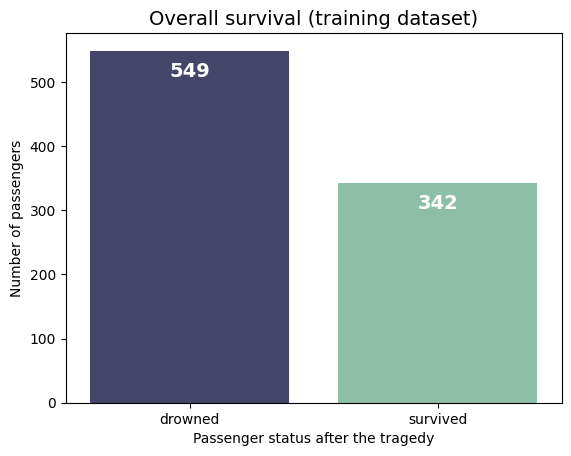

In [14]:
ax = sns.countplot(x = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['drowned', 'survived'])
plt.title('Overall survival (training dataset)',fontsize= 14)
plt.xlabel('Passenger status after the tragedy')
plt.ylabel('Number of passengers');

for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold');

In [15]:
all_data['Survived'].value_counts(normalize = True)

Survived
0.0    0.616162
1.0    0.383838
Name: proportion, dtype: float64

- Tenemos `891 pasajeros en el conjunto de datos, 549 (61,6%) de ellos se ahogaron y sólo 342 (38,4%) sobrevivieron`. Pero sabemos que los `botes salvavidas podían transportar al 53% del total de pasajeros`. Veamos la `distribución de las edades`. Usamos para estimar la distribución de probabilidad el método no paramétrico KDE (ver [Kernel density estimation
](https://en.wikipedia.org/wiki/Kernel_density_estimation#Further_reading)).

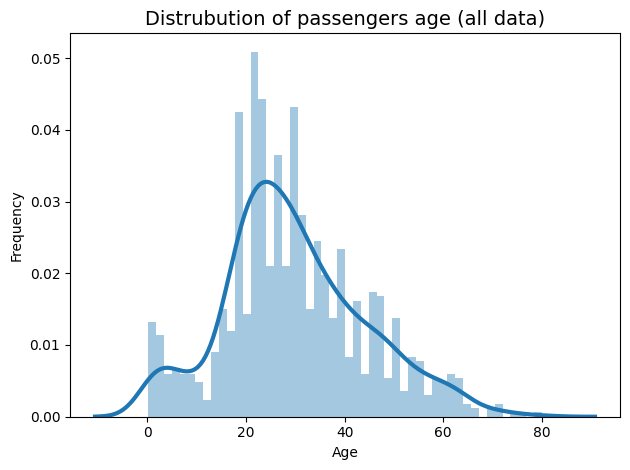

In [16]:
sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

In [17]:
age_distr = pd.DataFrame(all_data['Age'].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0


- La distribución de la `edad está ligeramente sesgada a la derecha`. La edad `varía entre 0.17 y 80 años`, con una `media = 29.88`. `¿Influyó mucho la edad en las posibilidades de sobrevivir?` Visualizamos dos distribuciones de edad, agrupadas por estatus de supervivencia.

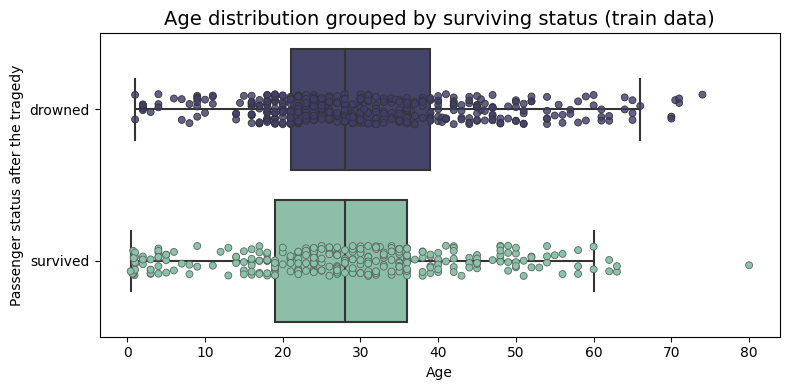

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(y = 'Survived', x = 'Age', data = train_data, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'Survived', x = 'Age', data = train_data, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

In [19]:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


- La media de edad de los `pasajeros supervivientes es de 28,34 años, 2,28 menos que la media de edad de los pasajeros ahogados` (los únicos de los que conocemos su estado de supervivencia). La `edad mínima de los pasajeros ahogados es de 1 año, lo que es muy triste`. La `edad máxima de los pasajeros ahogados es de 80 años`. Verifiquemos si existe un error.

In [20]:
all_data[all_data['Age'] == max(all_data['Age'] )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


- `Sr. Algernon Henry Barkworth nació el 4 de junio de 1864`, tenía **48 años en 1912** y `murió en 1945 a los 80 años` (ver [Algernon Henry Wilson Barkworth (1864 - 1945)](https://www.wikitree.com/wiki/Barkworth-2)).

In [21]:
train_data.loc[train_data['PassengerId'] == 631, 'Age'] = 48
all_data.loc[all_data['PassengerId'] == 631, 'Age'] = 48

In [22]:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.233345,14.684091,0.42,19.0,28.0,36.0,63.0


- La `media de edad de los pasajeros supervivientes es de 28,23 años`, `2,39 menos que la media de edad de los pasajeros ahogados`(los únicos de los que conocemos el estado de supervivencia). Parece que `hay más posibilidades de sobrevivir para los jóvenes`.

- Podemos ahora, verificar cuantos `pasajeros existen por cada clase (Pclass)`, y además, identificar frecuencia y proporción de ahogados, por cada una de las tres clases

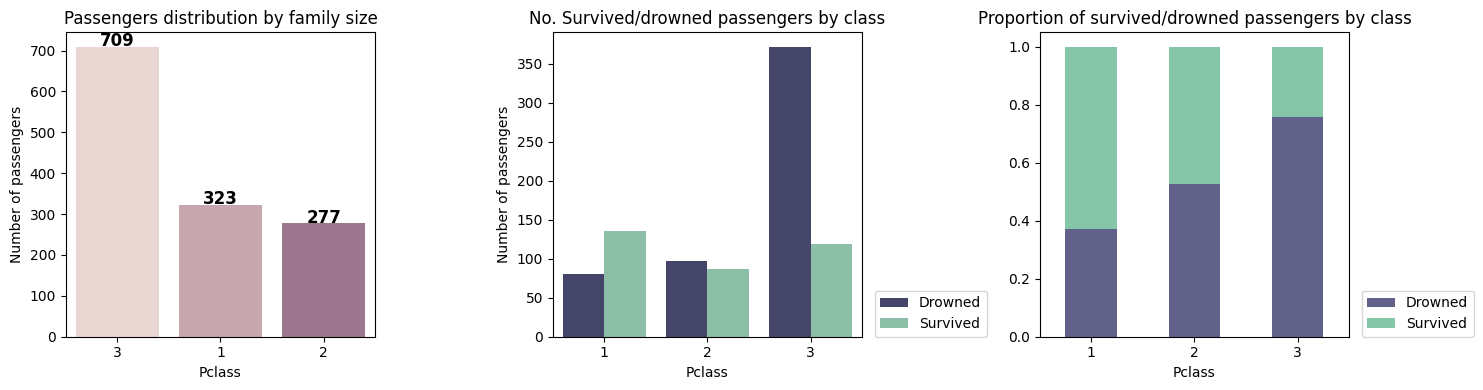

In [23]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
ax = sns.countplot(x=all_data['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'], 
                   order = all_data['Pclass'].value_counts(sort = False).index)
labels = (all_data['Pclass'].value_counts(sort = False))

for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

ax2 = fig.add_subplot(132)
sns.countplot(x = 'Pclass', hue = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('No. Survived/drowned passengers by class')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax3 = fig.add_subplot(133)
d = all_data.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax3, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

- El `Titanic` tenía `3 puntos de embarque` antes de que el buque iniciara su `ruta hacia Nueva York`

    - `Southampton`
    - `Cherbourg`
    - `Queenstown`

```{figure} ./imgs/embarkation_map.jpeg
:name: embarkation_map_fig
:align: center
```

```{figure} ./imgs/titanic_sank.jpg
:name: titanic_sank_fig
:align: center
```

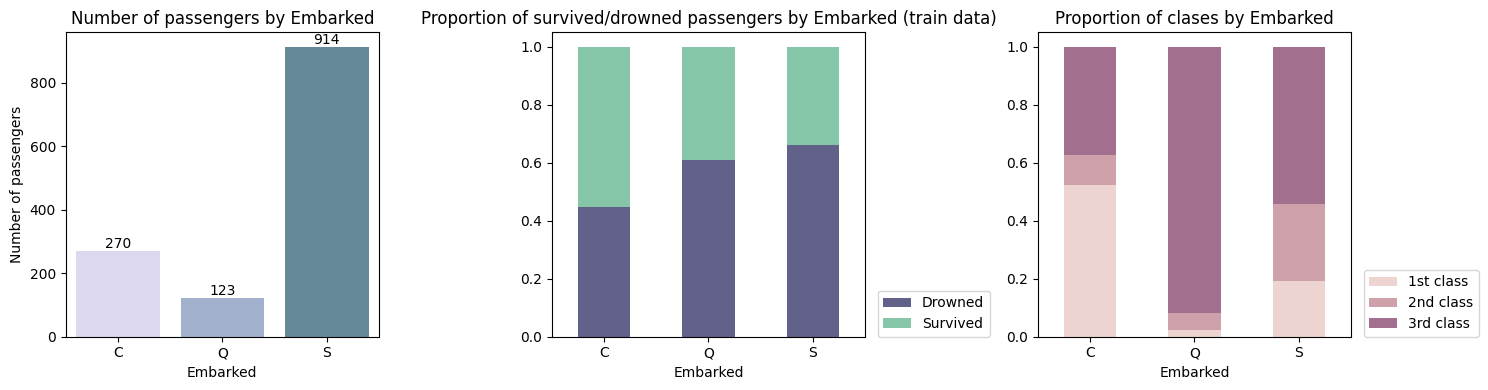

In [24]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(x=all_data['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers');

labels = (all_data['Embarked'].value_counts())
labels = labels.sort_index()

for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
ax2 = fig.add_subplot(132)
surv_by_emb = all_data.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax3 = fig.add_subplot(133)
class_by_emb = all_data.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()


- Este análisis explotario se puede extender aún mas, y estudiar por ejemplo, *ditribución de pasajeros por títulos, ubicación de las cabinas en el barco, tamaño de las familias, cantidad de pasajeros por clase, genero* entre otros. Queda como `ejercicio para el estudiante, extender el análisis de cada uno de estos casos`.

- Creamos `dos nuevos dataframe, df_train_ml y df_test_ml` sólo tendrán `características ordinales` y no tendrán `datos faltantes`. Para que puedan ser `utilizados por los algoritmos de ML`, realizamos `conversión de categórico a numérico mediante pd.get_dummies` `eliminando todas las características que no parezcan útiles para la predicción`. A continuación, utilizamos el `escalador estándar` y aplicamos la división `train/test`

In [25]:
df_train_ml = train_data.copy()
df_test_ml  = test_data.copy()

In [26]:
df_train_ml.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_train_ml.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train_ml.dropna(inplace=True)

In [28]:
df_train_ml.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [29]:
df_test_ml.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test_ml.dropna(inplace=True)

In [30]:
df_test_ml.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


- Con el objetivo de evitar (`dummy variable trap`), `eliminamos la primera columna` (*puede ser cualquier otra*). 

```{admonition} Dummy variable trap
:class: tip, dropdown

- La `trampa de la variable dummy` es un escenario en el que hay `atributos que están muy correlacionados` (multicolineales) y `una variable predice el valor de otras`. Cuando utilizamos la codificación de una sola variable para tratar los datos categóricos, `una variable dummy (atributo) puede predecirse con la ayuda de otras variables dummy`. 
- La `utilización de todas las variables dummies en modelos de ML conduce a una trampa de variables dummy`. Por lo tanto, los modelos de ML deben diseñarse para `excluir una variable dummy`.
```

In [31]:
cat_columns = ['Sex', 'Embarked', 'Pclass'];

In [32]:
df_train_ml = pd.get_dummies(df_train_ml, columns=cat_columns, drop_first=True)
df_train_ml.replace({False: 0, True: 1}, inplace=True)

In [33]:
df_train_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [34]:
df_test_ml = pd.get_dummies(df_test_ml, columns=cat_columns, drop_first=True)
df_test_ml.replace({False: 0, True: 1}, inplace=True)

In [35]:
df_test_ml.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
5,14.0,0,0,9.2250,1,0,1,0,1
6,30.0,0,0,7.6292,0,1,0,0,1
7,26.0,1,1,29.0000,1,0,1,1,0
8,18.0,0,0,7.2292,0,0,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,1


In [36]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Fare        712 non-null    float64
 5   Sex_male    712 non-null    int64  
 6   Embarked_Q  712 non-null    int64  
 7   Embarked_S  712 non-null    int64  
 8   Pclass_2    712 non-null    int64  
 9   Pclass_3    712 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 61.2 KB


In [37]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         331 non-null    float64
 1   SibSp       331 non-null    int64  
 2   Parch       331 non-null    int64  
 3   Fare        331 non-null    float64
 4   Sex_male    331 non-null    int64  
 5   Embarked_Q  331 non-null    int64  
 6   Embarked_S  331 non-null    int64  
 7   Pclass_2    331 non-null    int64  
 8   Pclass_3    331 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 25.9 KB


- Calculemos ahora `matriz de correlación`, para el conjunto de entrenamiento `df_train_ml`

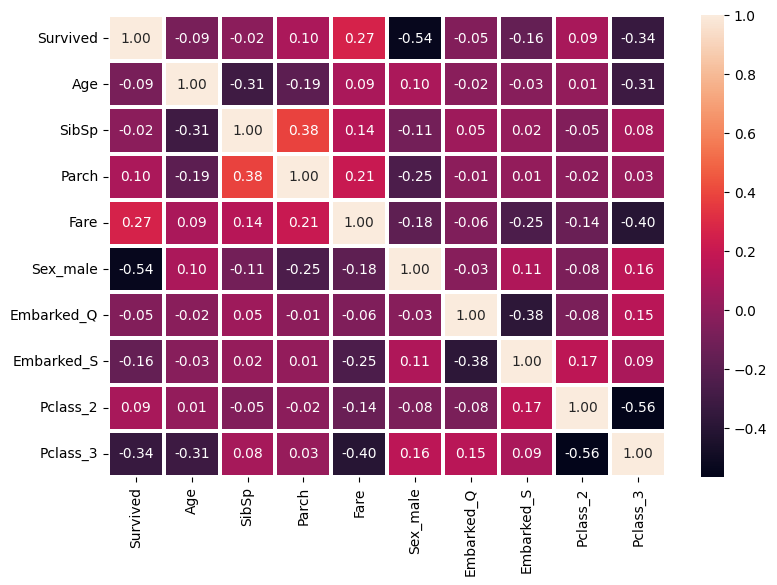

In [38]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

- Dividimos nuestros dataset `df_train_ml` en, conjunto de entrenamiento y de prueba. Posteriormente, `escalamos la partición de entrenamiento` usando [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], 
                                                    test_size=0.30, random_state=101)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train_sc = scaler.fit_transform(X_train, y_train)

In [44]:
clf = BernoulliNB()
clf.fit(X_train_sc, y_train)

BernoulliNB()

In [45]:
X_test_sc = scaler.transform(X_test)

In [46]:
y_pred = clf.predict(X_test_sc)
accuracy_score(y_test, y_pred)

0.7429906542056075

In [47]:
X_test_dfsc = scaler.transform(df_test_ml)

In [48]:
y_pred_df = clf.predict(X_test_dfsc)

In [49]:
y_pred_df

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

```{admonition} get_dummies vs OneHotEncoder
:class: tip, dropdown

- `get_dummies` es `un poco más conveniente` y probablemente por eso es un método popular. El verdadero problema es la `gestión de las características categóricas desconocidas que aparecerán` en la producción. Si el `número total de valores únicos en una columna categórica no es el mismo para nuestro conjunto de entrenamiento que para el conjunto de prueba, vamos a tener problemas`

- `OneHotEncoder es una clase transformadora`, por lo que `se puede ajustar a los datos`. Una vez ajustada, es capaz de `transformar los datos de validación basándose en las categorías que ha aprendido`. Básicamente, `get_dummies` puede utilizarse en el análisis exploratorio, mientras que `OneHotEncoder` en el cálculo y la estimación. Además, puede utilizarse con `TensorFlow`.
```

In [50]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [51]:
df = pd.DataFrame({'label': ['Label1', 'Label4', 'Label2', 'Label2', 'Label1', 'Label3', 'Label3']})
df


,label
0,Label1
1,Label4
2,Label2
3,Label2
4,Label1
5,Label3
6,Label3


In [52]:
X = df['label'].values.reshape(-1, 1)
enc = OneHotEncoder().fit(X)

X = enc.transform(X).toarray()
print(X)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [53]:
X = enc.inverse_transform(X)
print(X)

[['Label1']
 ['Label4']
 ['Label2']
 ['Label2']
 ['Label1']
 ['Label3']
 ['Label3']]


In [54]:
pd.get_dummies(df, dtype=float)

,label_Label1,label_Label2,label_Label3,label_Label4
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0


In [55]:
pd.get_dummies(df, dtype=float, drop_first=True)

,label_Label2,label_Label3,label_Label4
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0


In [56]:
df.values

array([['Label1'],
       ['Label4'],
       ['Label2'],
       ['Label2'],
       ['Label1'],
       ['Label3'],
       ['Label3']], dtype=object)

In [57]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from numpy import argmax
import tensorflow as tf

In [58]:
le = LabelEncoder()
integer_encoded = le.fit_transform(df.values)
print(integer_encoded)

[0 3 1 1 0 2 2]


In [59]:
encoded = tf.keras.utils.to_categorical(integer_encoded)
print(encoded)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [60]:
import numpy as np
inverted = np.argmax(encoded, axis=1)
print(inverted)

[0 3 1 1 0 2 2]


In [61]:
le.inverse_transform(inverted)

array(['Label1', 'Label4', 'Label2', 'Label2', 'Label1', 'Label3',
       'Label3'], dtype=object)

```{admonition} Observaciones
- A partir del gráfico KDE para `Age`, se observa que tiene una distribución cercana a la Gaussiana. Por tanto, aplicar el modelo `Gaussiano de Naive Bayes` a los datos podría ser una buena idea. `GaussianNB` se utiliza sobre todo con datos de muy alta dimensión, mientras que las otras dos variants de Bayes `MultinomialNB` y `BinaryNB`, se utilizan ampliamente para datos de recuento dispersos, como el texto. `MultinomialNB` suele funcionar mejor que `BinaryNB`, especialmente en conjuntos de datos con un número relativamente grande de características no nulas.

- Los `modelos Bayesiano` comparten muchos de los puntos fuertes y débiles de los modelos lineales`. Son muy `rápidos de entrenar y predecir, y el procedimiento de entrenamiento es fácil de entender`. Los modelos `funcionan muy bien con datos dispersos de alta dimensión y son relativamente robustos a los parámetros`. Los modelos `Naive Bayes se utilizan a menudo en conjuntos de datos muy grandes`, donde el entrenamiento incluso de un modelo lineal podría llevar demasiado tiempo.
``````